In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.shape

(252, 15)

# Missing Values

In [ ]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

We don't need to deal with missing values !

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


# Preprocessing

In [ ]:
df['Height'] = df['Height'] * 2.54 # Converting to cm

In [ ]:
df["Weight"] = df["Weight"] * 0.453592 # Converting to kg

In [ ]:
df['Bmi']=df['Weight']/((df['Height']/100)**2)

# Visualizations


## BodyFat distribution

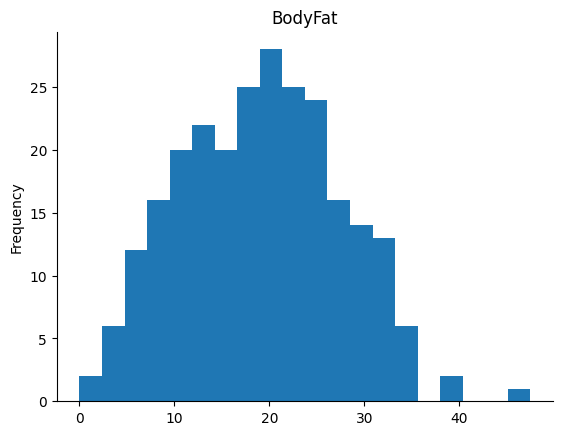

In [ ]:
df['BodyFat'].plot(kind='hist', bins=20, title='BodyFat')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Weight in function of Height

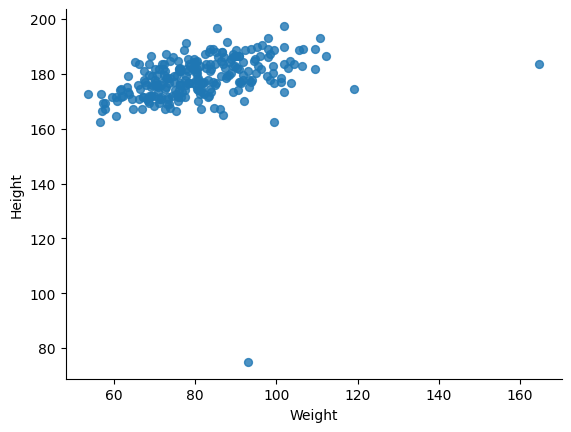

In [ ]:
df.plot(kind='scatter', x='Weight', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## BodyFat in function of Age

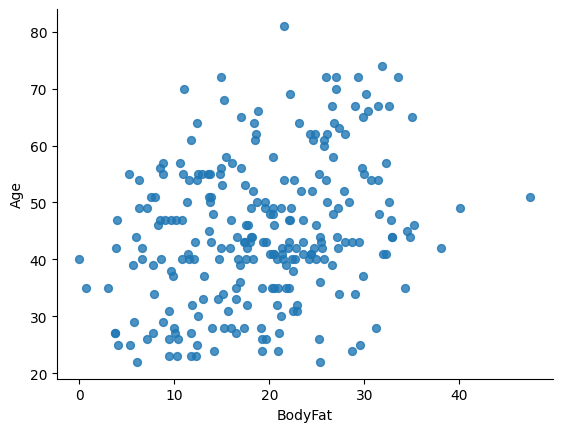

In [ ]:
df.plot(kind='scatter', x='BodyFat', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Weight classification in function of BMI

In [ ]:
def bmi_to_weight(bmi):
  if bmi < 18.5:
    return 'underweight'
  if bmi < 24.9:
    return 'normal weight'
  if bmi < 29.9:
    return 'overweight'
  if bmi < 39.9:
    return 'obesity'
  return 'morbid obesity'

In [ ]:
df['Weight Category'] = df['Bmi'].apply(bmi_to_weight)

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,Weight Category
0,1.0708,12.3,23,69.966566,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.626779,normal weight
1,1.0853,6.1,22,78.584814,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.334338,normal weight
2,1.0414,25.3,22,69.853168,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.668737,normal weight
3,1.0751,10.4,26,83.801122,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.883227,normal weight
4,1.0340,28.7,24,83.574326,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.517358,overweight


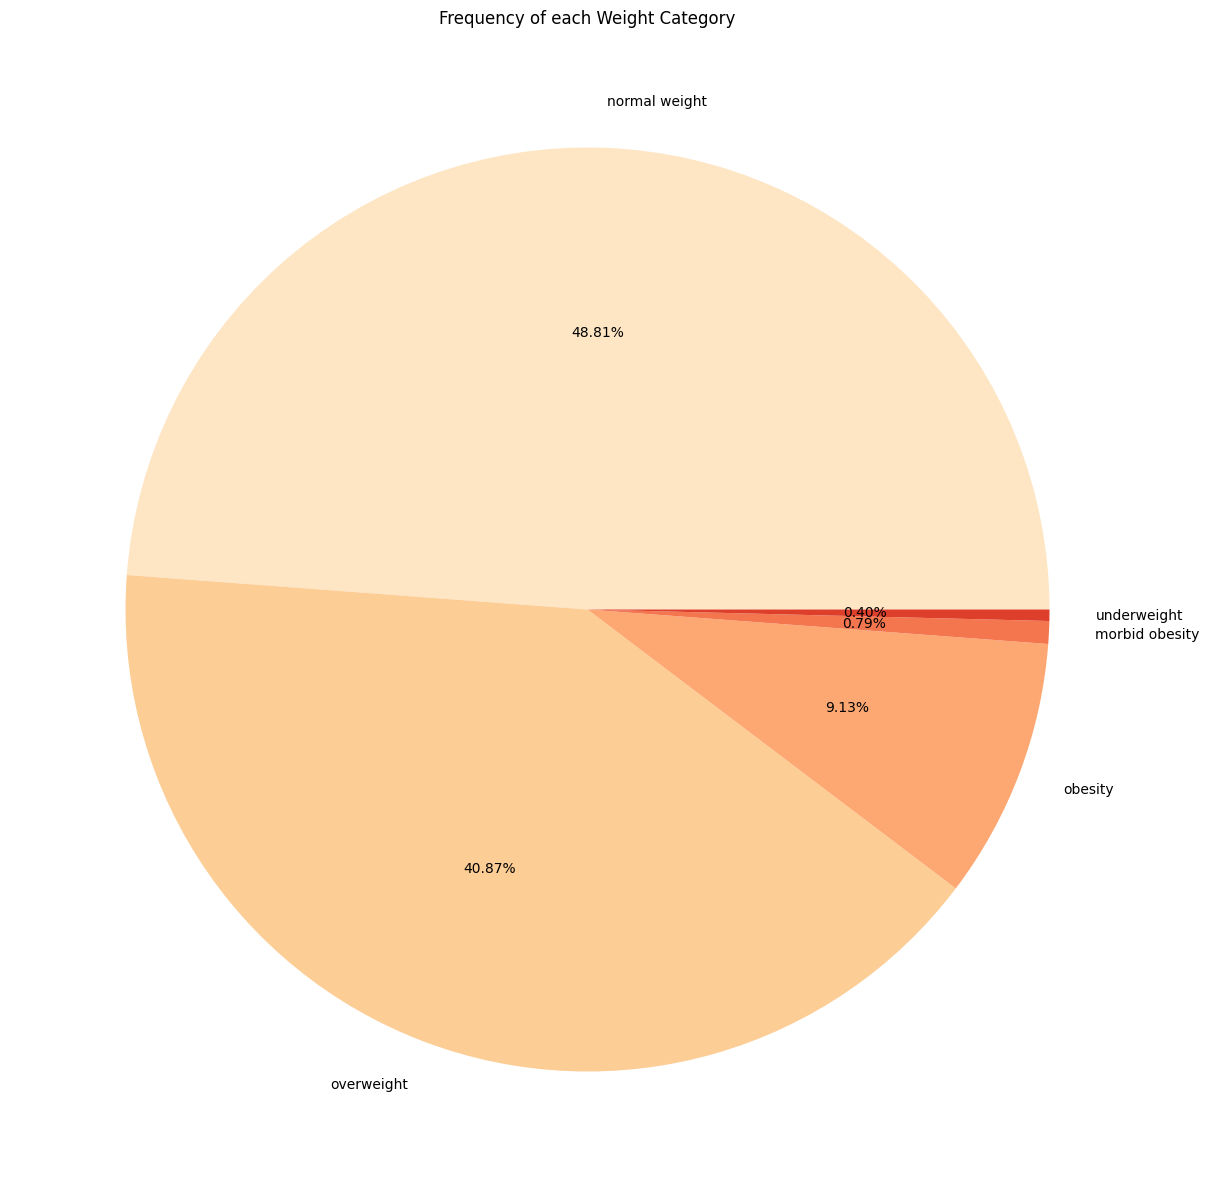

In [ ]:
plt.figure(figsize=(15,15))
total = df.shape[0]
labels = df['Weight Category'].unique()
freq = [df['Weight Category'].value_counts()[cw]/total for cw in labels]
colors = sns.color_palette('OrRd')
plt.pie(freq, labels = labels, colors = colors, autopct='%.2f%%')
plt.title("Frequency of each Weight Category")
plt.show()

In [ ]:
df.drop('Weight Category',axis= 1, inplace=True)

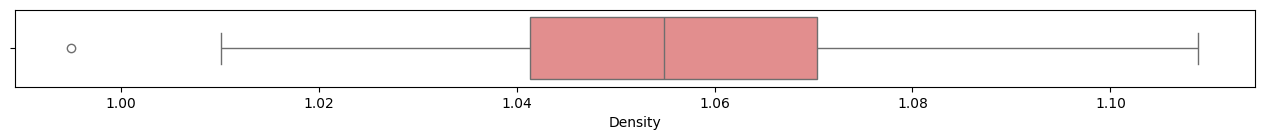

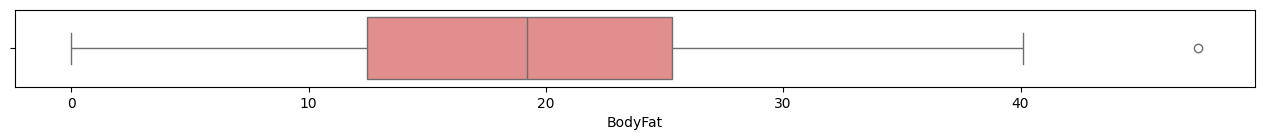

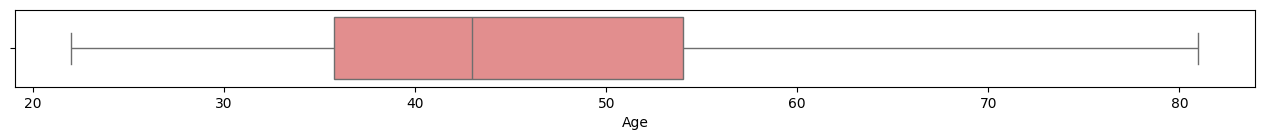

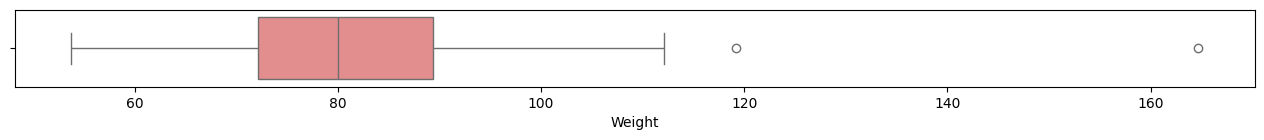

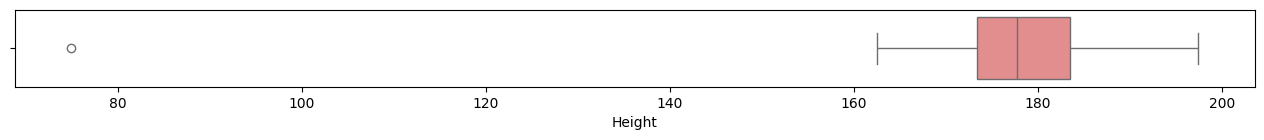

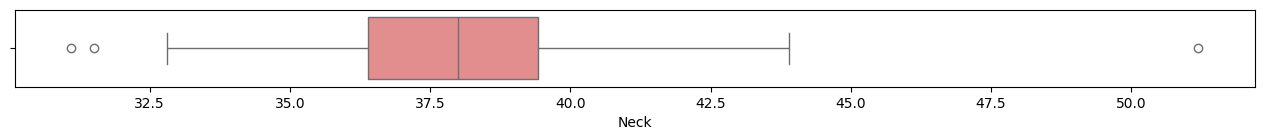

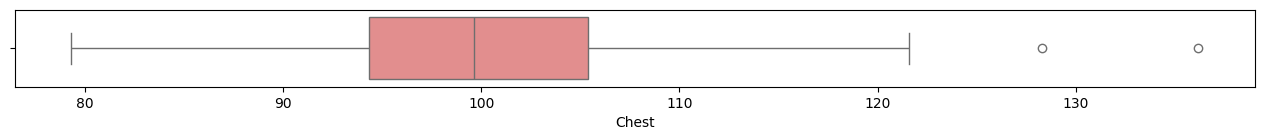

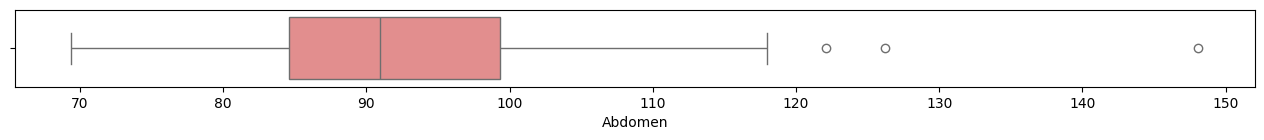

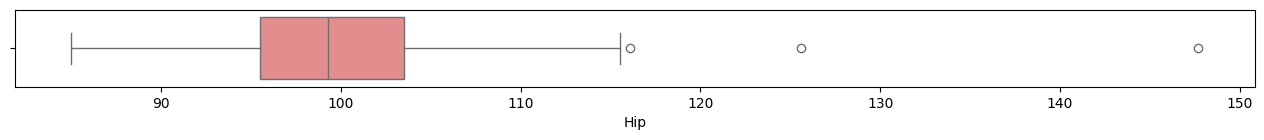

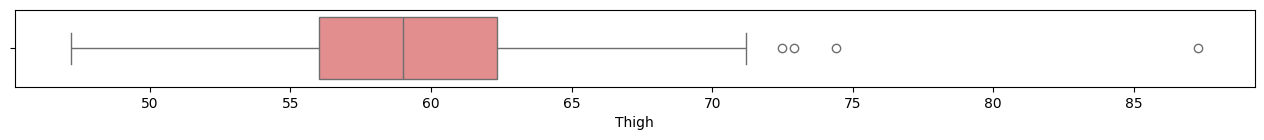

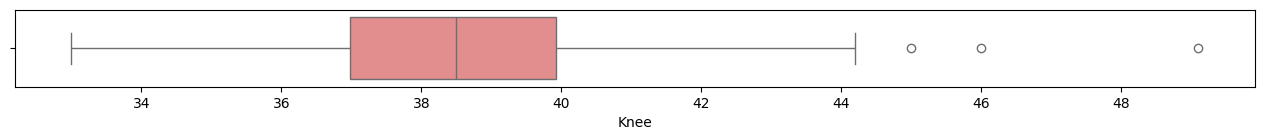

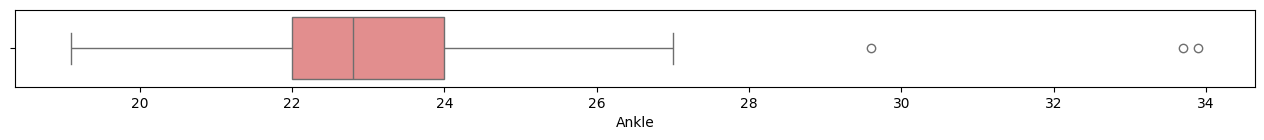

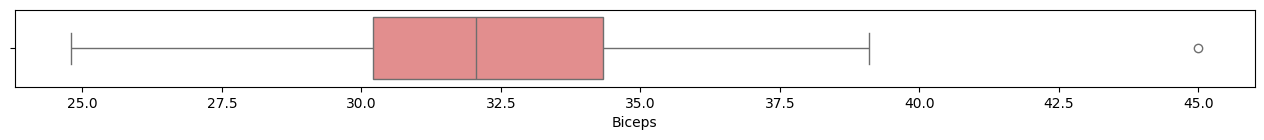

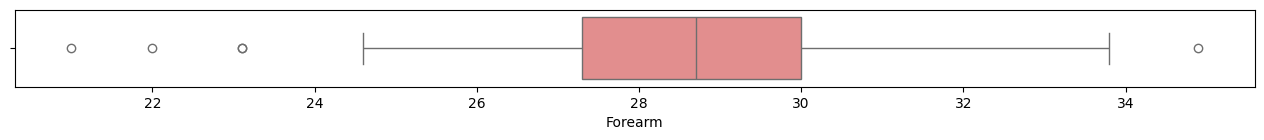

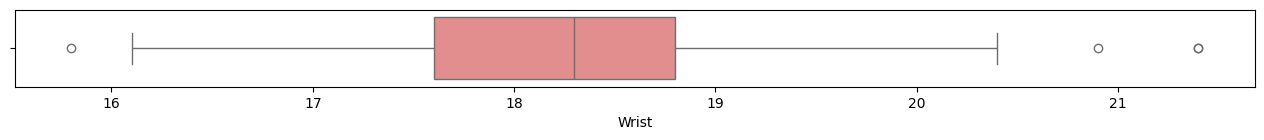

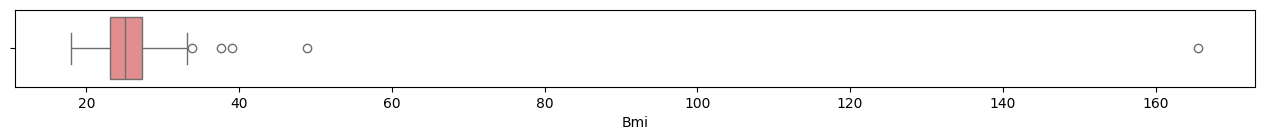

In [ ]:
for column in df:
    plt.figure(figsize=(16,1))
    sns.boxplot(data=df,x=column,color='lightcoral')

# Correlation

<Axes: >

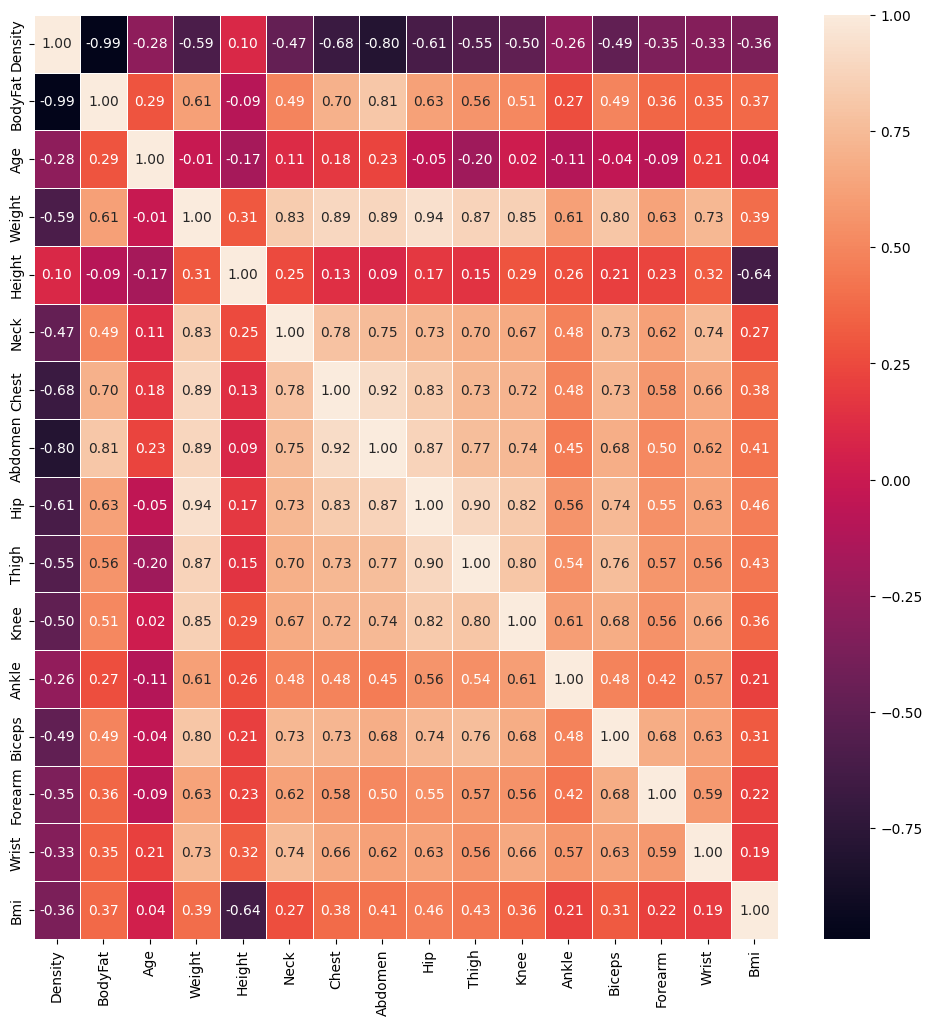

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

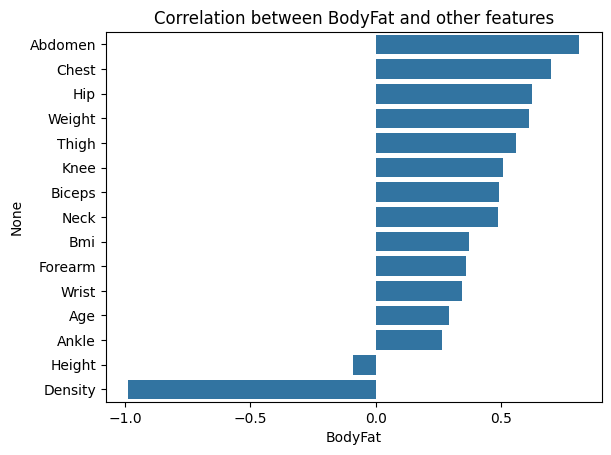

In [ ]:
corr = df.corr()
corr = corr.BodyFat
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr,y=cr.index)
plt.xticks(np.arange(-1,1,.5))
plt.title('Correlation between BodyFat and other features')
plt.show()

- There is multicolinearity in the dataset
- Body Density is too much correlate to BodyFat due to the fact that : Percentage of Body Fat (i.e. 100*B) = 495/Density - 450.
So, we need to drop Density.

In [ ]:
df.drop('Density', axis=1, inplace=True)

In [ ]:
df_corr = df.drop('Height', axis=1)

In [ ]:
# Set a correlation threshold
correlation_threshold = 0.8
penalities = {col : abs(df_corr.corr()['BodyFat'][col]) for col in df_corr.columns}
# Identify highly correlated features
highly_correlated_features = []
for i in range(len(df_corr.corr().columns)):
  if df_corr.corr().columns[i] != 'BodyFat' :
      for j in range(i):
          if df_corr.corr().columns[j] != 'BodyFat' and abs(df_corr.corr().iloc[i, j]) > correlation_threshold:
            if abs(df_corr.corr()['BodyFat'].iloc[i]) > abs(df_corr.corr()['BodyFat'].iloc[j]):
                colname1 = df_corr.corr().columns[i]
                colname2 = df_corr.corr().columns[j]
            else:
                colname2 = df_corr.corr().columns[i]
                colname1 = df_corr.corr().columns[j]
            if (colname1, colname2) not in highly_correlated_features:
              highly_correlated_features.append((colname1, colname2))

            penalities[colname1] -= 0.5
            penalities[colname2] -= 1

print("Columns too much corrolate :")
print(highly_correlated_features)

Columns too much corrolate :
[('Weight', 'Neck'), ('Chest', 'Weight'), ('Abdomen', 'Weight'), ('Abdomen', 'Chest'), ('Hip', 'Weight'), ('Chest', 'Hip'), ('Abdomen', 'Hip'), ('Weight', 'Thigh'), ('Hip', 'Thigh'), ('Weight', 'Knee'), ('Hip', 'Knee'), ('Weight', 'Biceps')]


In [ ]:
print('current penalities :')
penalities

current penalities :


{'BodyFat': 1.0,
 'Age': 0.29145844013522204,
 'Weight': -4.387585997797352,
 'Neck': -0.5094081465589604,
 'Chest': -1.297379661106136,
 'Abdomen': -0.686567715218951,
 'Hip': -2.8747990824913376,
 'Thigh': -1.4403924680059106,
 'Knee': -1.4913347571145323,
 'Ankle': 0.265969770306373,
 'Biceps': -0.5067288741083844,
 'Forearm': 0.3613869031997192,
 'Wrist': 0.34657486452658576,
 'Bmi': 0.37139475232940544}

In [ ]:
penalities_threshold = -2
col_to_drop = []
for c,p in penalities.items():
  if p < penalities_threshold:
    col_to_drop.append(c)
col_to_drop

['Weight', 'Hip']

In [ ]:
df_corr.drop(columns=col_to_drop, inplace=True)
df_corr.head()

,BodyFat,Age,Neck,Chest,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,12.3,23,36.2,93.1,85.2,59.0,37.3,21.9,32.0,27.4,17.1,23.626779
1,6.1,22,38.5,93.6,83.0,58.7,37.3,23.4,30.5,28.9,18.2,23.334338
2,25.3,22,34.0,95.8,87.9,59.6,38.9,24.0,28.8,25.2,16.6,24.668737
3,10.4,26,37.4,101.8,86.4,60.1,37.3,22.8,32.4,29.4,18.2,24.883227
4,28.7,24,34.4,97.3,100.0,63.2,42.2,24.0,32.2,27.7,17.7,25.517358


# Normalization

In [ ]:
continuous_data = []
for col in df.columns:
  if len(df[col].unique()) > 31:
    continuous_data.append(col)
continuous_data

['BodyFat',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'Bmi']

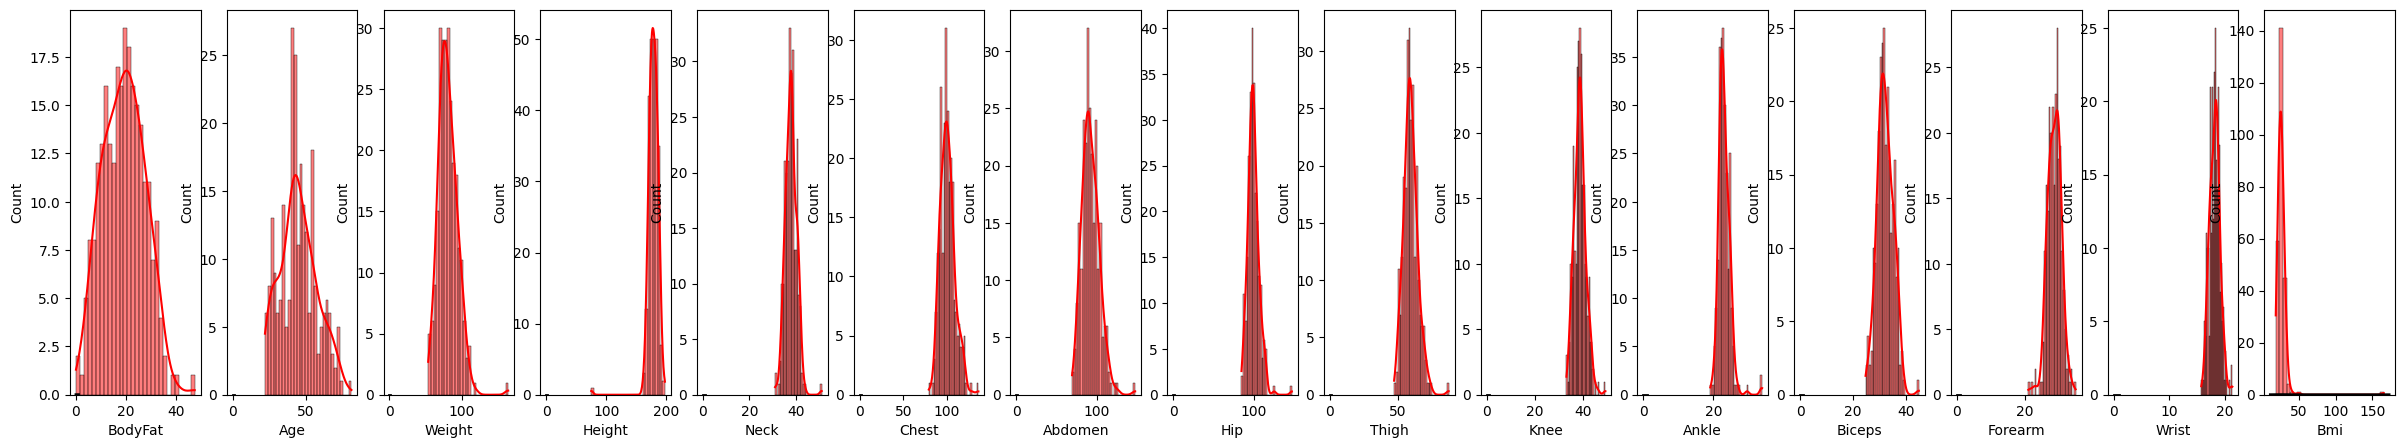

In [ ]:
from scipy.stats import norm
fig, axes = plt.subplots(1, len(continuous_data), figsize=(30, 5))
for i, col in enumerate(continuous_data):
  #plot_normal_distribution(col)
  data = df[col]
  # Plot the histogram with KDE
  sns.histplot(data, kde=True,ax=axes[i], color='red', bins=30)

  # Overlay the normal distribution
  mu, std = np.mean(data), np.std(data)
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  axes[i].plot(x, p, 'k', linewidth=2)

plt.show()

In [ ]:
def plot_normalize_method(col):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    data = df[col]
    # Original data
    sns.histplot(data, ax=axes[0], color='blue').set_title('Normal Data')
    # Log-transformed data
    sns.histplot(np.log1p(data + 0.0000001), ax=axes[1], color='red').set_title("log1p")
    # Square root-transformed data
    sns.histplot(np.sqrt(data), ax=axes[2], color='green').set_title("Square root")
    # Cube root-transformed data
    sns.histplot(np.cbrt(data * 2), ax=axes[3], color='purple').set_title("Cube root")
    plt.show()

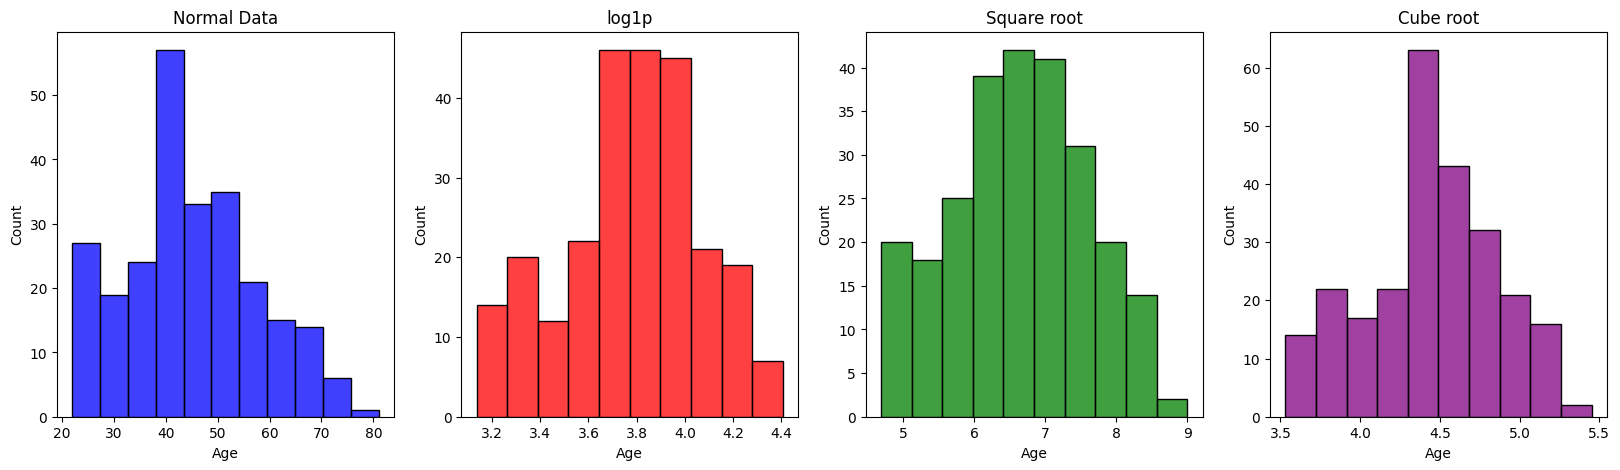

In [ ]:
plot_normalize_method('Age')

In [ ]:
df_norm = df.copy()
df_norm['Age'] = np.sqrt(df_norm['Age'])

In [ ]:
df_norm_corr = df_corr.copy()
df_norm_corr['Age'] = np.sqrt(df_norm_corr['Age'])

# Force Brut Model

In [ ]:
df.name = 'normal dataset'
df_corr.name = 'considering correlation'
df_norm.name = 'sqrt of Age'
df_norm_corr.name = 'considering correlation & sqrt of Age'
datasets = [df, df_corr, df_norm, df_norm_corr]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import clear_output
from IPython.display import display, HTML
import math

In [ ]:
def model_eval(dataset, model, test_size):
  #custom split data with dataset and test_size
  X = dataset.drop('BodyFat', axis=1)
  y = dataset['BodyFat']
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size,  random_state=42)
  #fit data
  model.fit(x_train, y_train)
  #predict
  y_pred = model.predict(x_test)
  #get score information
  info = []
  info.append(mean_absolute_error(y_test, y_pred))
  info.append(math.sqrt(mean_squared_error(y_test,y_pred)))
  info.append(r2_score(y_test, y_pred))

  return y_pred, y_test, info

In [ ]:
def compare_model(datasets, models, test_sizes):
    datas = []
    # name of each models
    models_array = []
    test_sizes_array = []
    # save mean absolute error
    maes = []
    # save rmse
    rmses = []
    # save r2 score
    r2_scores = []
    # total of training we will compute
    total_iter = len(models) * len(test_sizes) * len(datasets)
    i = 0
    for df in datasets:
      for model in models:
        for test_size in test_sizes:
          try:
            #display where we are on the run
            display(HTML(f'<h2>Current Iteration: {i + 1}/{total_iter}</h2>'))
            _, _, info = model_eval(df,model,test_size)
            datas.append(df.name)
            test_sizes_array.append(test_size)
            models_array.append(str(model).split('(')[0])
            maes.append(info[0])
            rmses.append(info[1])
            r2_scores.append(info[2])

            # clear print output
            clear_output(wait=True)

          except Exception as e:
            e
          i +=1

    # save all in a dataframe
    return pd.DataFrame({
        'dataset' : datas,
        'model' : models_array,
        'test_size' : test_sizes_array,
        'mae' : maes,
        'rmse' : rmses,
        'r2_score' : r2_scores})

In [ ]:
!pip install catboost

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Create instances of regression models
xgboost_regressor = XGBRegressor()
lgbm_regressor = LGBMRegressor(num_leaves=41, n_estimators=200, random_state=42)
catboost_regressor = CatBoostRegressor()
extra_trees_regressor = ExtraTreesRegressor(random_state=42)
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
svr_regressor = SVR()

# Create an array of regression models
models = [
    xgboost_regressor, catboost_regressor, lgbm_regressor, extra_trees_regressor,
    linear_regressor, decision_tree_regressor, random_forest_regressor, svr_regressor
]


In [ ]:
test_sizes = [0.1, 0.2]
df_compare = compare_model(datasets, models, test_sizes)

In [ ]:
df_compare = df_compare.sort_values(by='mae')
df_compare.head(10)

,dataset,model,test_size,mae,rmse,r2_score
24,considering correlation,LinearRegression,0.1,2.705574,3.512469,0.661583
56,considering correlation & sqrt of Age,LinearRegression,0.1,2.706284,3.501590,0.663676
16,considering correlation,XGBRegressor,0.1,2.785668,3.665547,0.631443
48,considering correlation & sqrt of Age,XGBRegressor,0.1,2.785668,3.665547,0.631443
12,normal dataset,RandomForestRegressor,0.1,2.898692,3.460341,0.671553
44,sqrt of Age,RandomForestRegressor,0.1,2.907231,3.472912,0.669162
2,normal dataset,<catboost.core.CatBoostRegressor object at 0x7...,0.1,2.910477,3.678515,0.628830
34,sqrt of Age,<catboost.core.CatBoostRegressor object at 0x7...,0.1,2.910477,3.678515,0.628830
52,considering correlation & sqrt of Age,LGBMRegressor,0.1,2.927519,3.839763,0.595577
20,considering correlation,LGBMRegressor,0.1,2.927519,3.839763,0.595577


In [ ]:
df_compare = df_compare.sort_values(by='rmse')
df_compare.head(10)

,dataset,model,test_size,mae,rmse,r2_score
12,normal dataset,RandomForestRegressor,0.1,2.898692,3.460341,0.671553
44,sqrt of Age,RandomForestRegressor,0.1,2.907231,3.472912,0.669162
56,considering correlation & sqrt of Age,LinearRegression,0.1,2.706284,3.501590,0.663676
24,considering correlation,LinearRegression,0.1,2.705574,3.512469,0.661583
8,normal dataset,LinearRegression,0.1,2.971923,3.531250,0.657954
40,sqrt of Age,LinearRegression,0.1,2.979194,3.536522,0.656932
6,normal dataset,ExtraTreesRegressor,0.1,2.963538,3.578731,0.648694
28,considering correlation,RandomForestRegressor,0.1,2.944231,3.589970,0.646484
60,considering correlation & sqrt of Age,RandomForestRegressor,0.1,2.943923,3.594887,0.645515
36,sqrt of Age,LGBMRegressor,0.1,2.988894,3.628928,0.638770


In [ ]:
df_compare = df_compare.sort_values(by='r2_score', ascending=False)
df_compare.head(10)

,dataset,model,test_size,mae,rmse,r2_score
39,sqrt of Age,ExtraTreesRegressor,0.2,3.228824,3.866465,0.678629
7,normal dataset,ExtraTreesRegressor,0.2,3.237353,3.892314,0.674318
12,normal dataset,RandomForestRegressor,0.1,2.898692,3.460341,0.671553
44,sqrt of Age,RandomForestRegressor,0.1,2.907231,3.472912,0.669162
23,considering correlation,ExtraTreesRegressor,0.2,3.235667,3.927844,0.668345
55,considering correlation & sqrt of Age,ExtraTreesRegressor,0.2,3.224157,3.949568,0.664666
56,considering correlation & sqrt of Age,LinearRegression,0.1,2.706284,3.501590,0.663676
24,considering correlation,LinearRegression,0.1,2.705574,3.512469,0.661583
8,normal dataset,LinearRegression,0.1,2.971923,3.531250,0.657954
40,sqrt of Age,LinearRegression,0.1,2.979194,3.536522,0.656932


# Final Dataset

In [ ]:
df = df_norm_corr.copy()
df.head()

,BodyFat,Age,Neck,Chest,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,12.3,4.795832,36.2,93.1,85.2,59.0,37.3,21.9,32.0,27.4,17.1,23.626779
1,6.1,4.690416,38.5,93.6,83.0,58.7,37.3,23.4,30.5,28.9,18.2,23.334338
2,25.3,4.690416,34.0,95.8,87.9,59.6,38.9,24.0,28.8,25.2,16.6,24.668737
3,10.4,5.099020,37.4,101.8,86.4,60.1,37.3,22.8,32.4,29.4,18.2,24.883227
4,28.7,4.898979,34.4,97.3,100.0,63.2,42.2,24.0,32.2,27.7,17.7,25.517358


#Linear Regression

In [ ]:
X = df.drop('BodyFat', axis=1)
y = df['BodyFat']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}')
print(f'r2 score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'rmse: {rmse}')

Mean Squared Error: 21.435076609400035
r2 score: 0.539209674395323
Mean Absolute Error: 3.431108117204763
rmse: 4.629803085380634


In [ ]:
print('Coefficients:', model_linear.coef_)
print('Intercept:', model_linear.intercept_)

Coefficients: [ 1.3822012  -0.27914953 -0.20440789  0.8992216   0.06225306 -0.3287872
  0.19647993  0.23316542  0.23825231 -2.12518138  0.01990792]
Intercept: -13.562492010154763


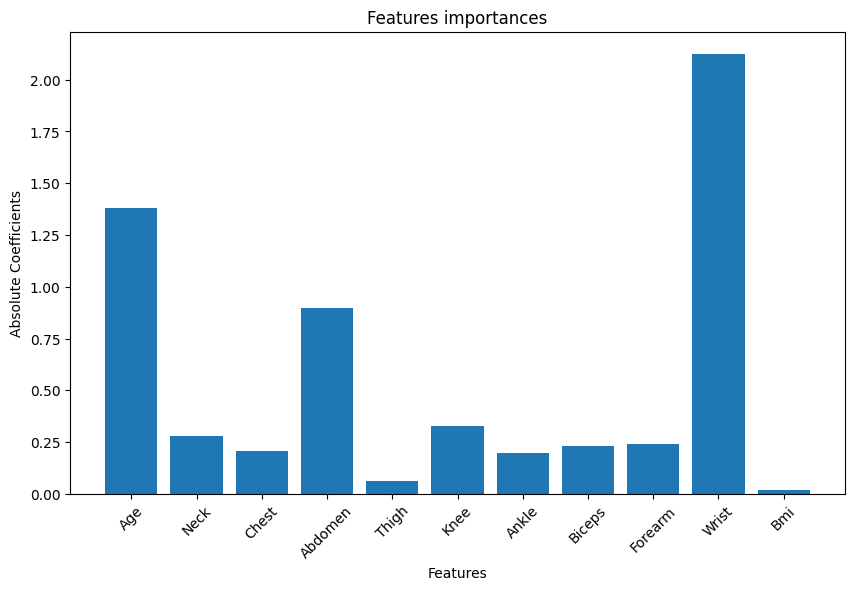

In [ ]:
import numpy as np


column_names = ['Age',	'Neck',	'Chest',	'Abdomen',	'Thigh',	'Knee',	'Ankle',	'Biceps',	'Forearm',	'Wrist',	'Bmi']

# Plot histogram of coefficients
plt.figure(figsize=(10, 6))
plt.bar(column_names, np.abs(model_linear.coef_))
plt.xlabel('Features')
plt.ylabel('Absolute Coefficients')
plt.title('Features importances')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def plot_error(y_test, y_pred):
  residuals = y_test - y_pred
  # Plotting the Residuals
  plt.scatter(y_test, residuals, color='blue')
  plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
  plt.title('Residual Plot')
  plt.xlabel('Actual Values')
  plt.ylabel('Residuals')
  plt.show()

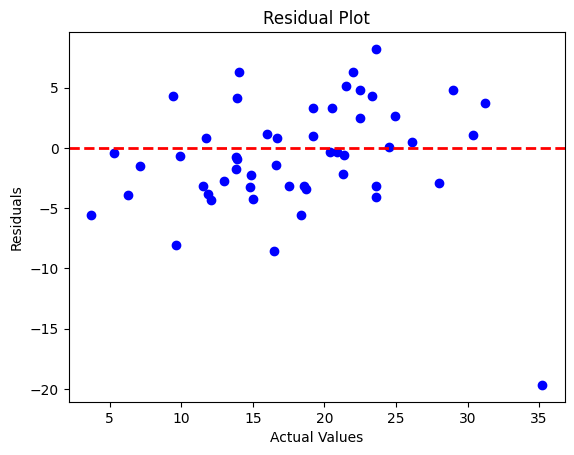

In [ ]:
plot_error(y_test, y_pred)

# RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create GridSearchCV object with RandomForestRegressor and parameter grid
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
model_rf = RandomForestRegressor(**grid_search.best_params_)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [ ]:
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}')
print(f'r2 score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'rmse: {rmse}')

Mean Squared Error: 15.442166295944881
r2 score: 0.6680394026476411
Mean Absolute Error: 3.258566475681182
rmse: 3.9296521851106467


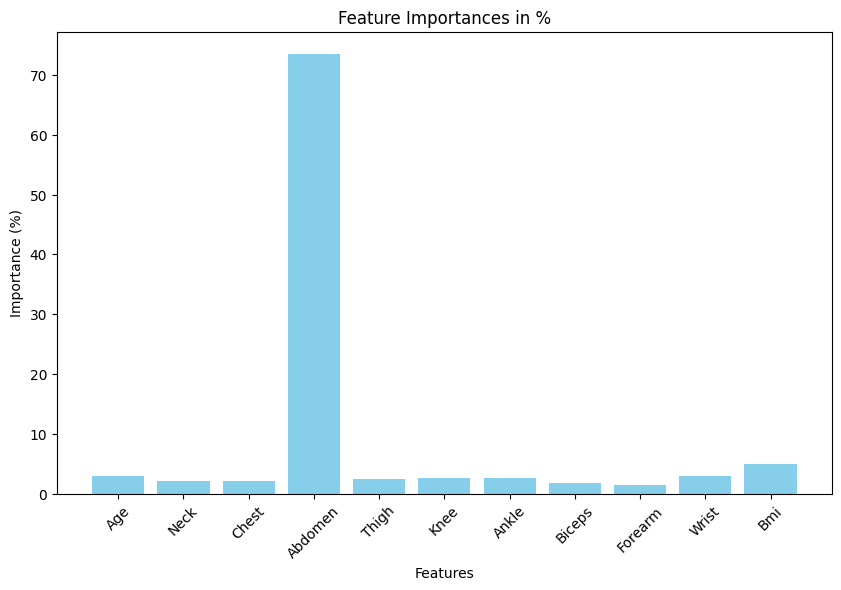

In [ ]:
# Plotting feature importance
feature_importance = model_rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importance*100, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importances in %')
plt.xticks(rotation=45)
plt.show()

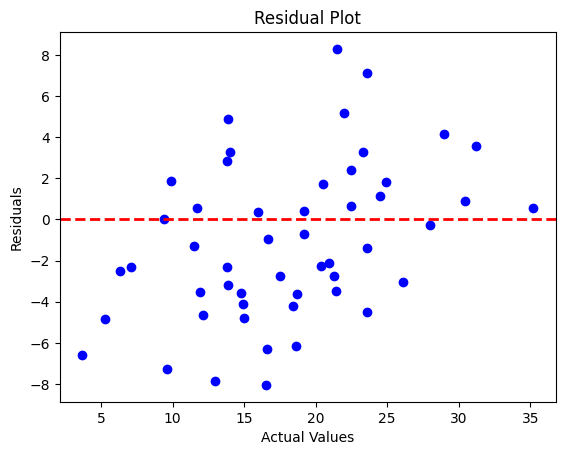

In [ ]:
plot_error(y_test, y_pred)

# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create GridSearchCV object with RandomForestRegressor and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
model_xgboost = XGBRegressor(**grid_search.best_params_)
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model_xgboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}')
print(f'r2 score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'rmse: {rmse}')

Mean Squared Error: 16.401886845809155
r2 score: 0.6474082683288804
Mean Absolute Error: 3.3046149048150757
rmse: 4.049924301244303


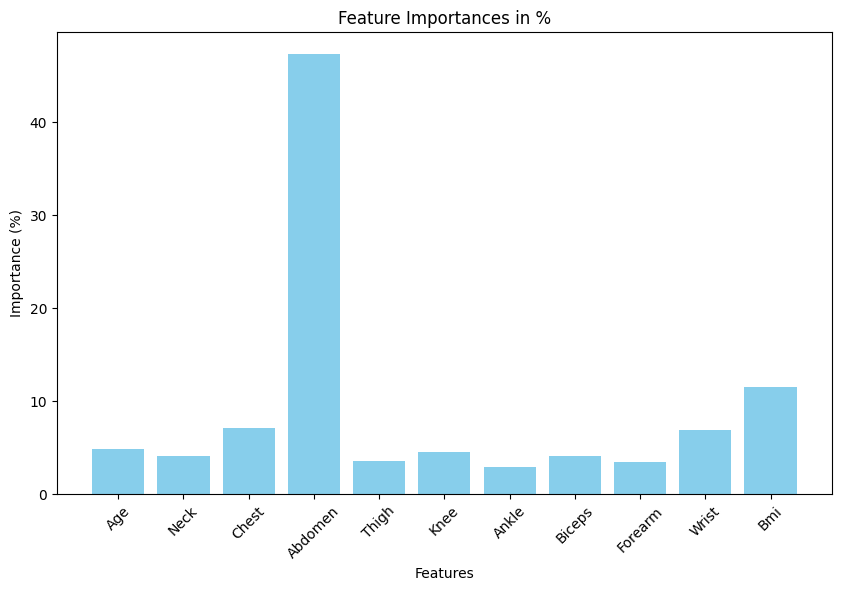

In [ ]:
# Plotting feature importance
feature_importance = model_xgboost.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importance*100, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importances in %')
plt.xticks(rotation=45)
plt.show()

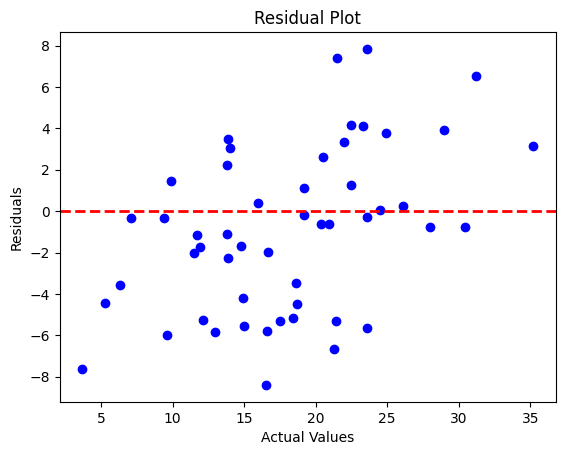

In [ ]:
plot_error(y_test, y_pred)

# CatBoostRegressor

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Create the CatBoostRegressor model
model_catboost = CatBoostRegressor(random_state=42, verbose=False)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Create GridSearchCV object with CatBoostRegressor and parameter grid
grid_search_catboost = GridSearchCV(estimator=model_catboost, param_grid=param_grid,
                                    scoring='r2', cv=5, verbose=1)

# Fit the GridSearchCV object to the data
grid_search_catboost.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search_catboost.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150}


In [ ]:
model_cat = CatBoostRegressor(**grid_search_catboost.best_params_,verbose=False)
model_cat.fit(X_train, y_train)

In [ ]:
y_pred = model_cat.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}')
print(f'r2 score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'rmse: {rmse}')

Mean Squared Error: 15.371220479340005
r2 score: 0.6695645264682537
Mean Absolute Error: 3.2599685896144415
rmse: 3.9206148088456745


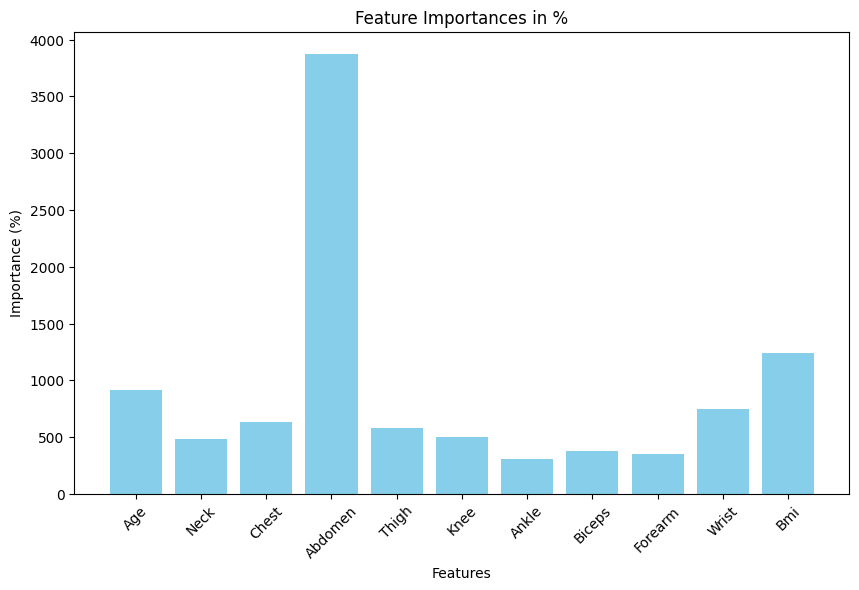

In [ ]:
# Plotting feature importance
feature_importance = model_cat.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importance*100, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.title('Feature Importances in %')
plt.xticks(rotation=45)
plt.show()

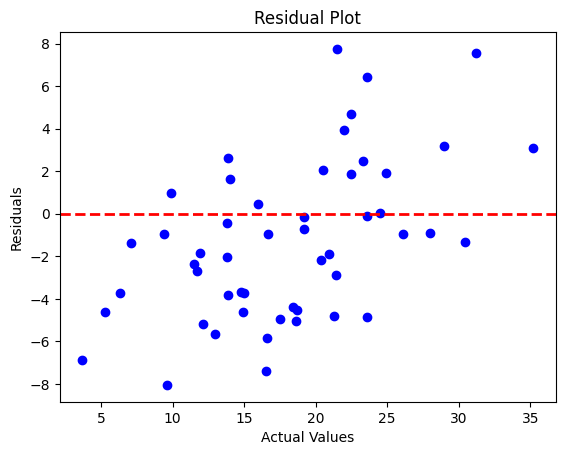

In [ ]:
plot_error(y_test, y_pred)

# Best model

In [ ]:
model = model_cat

# Explainability

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])

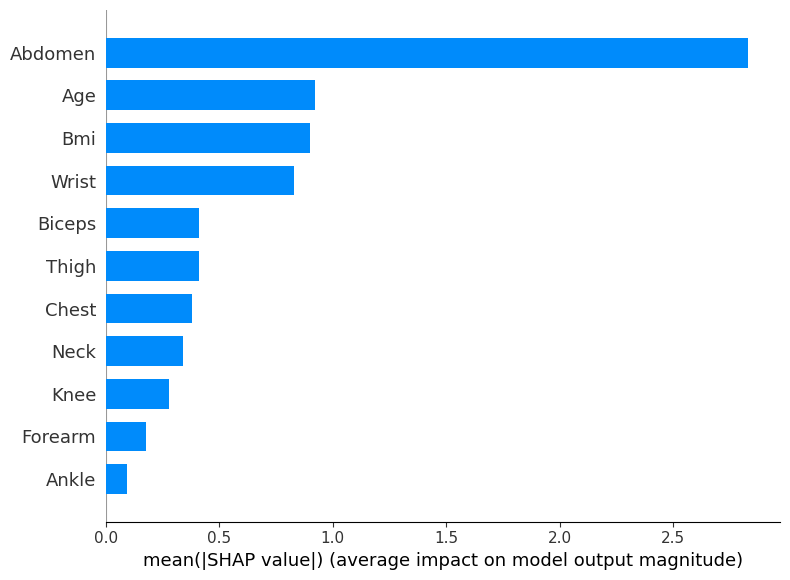

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Beeswarm plot

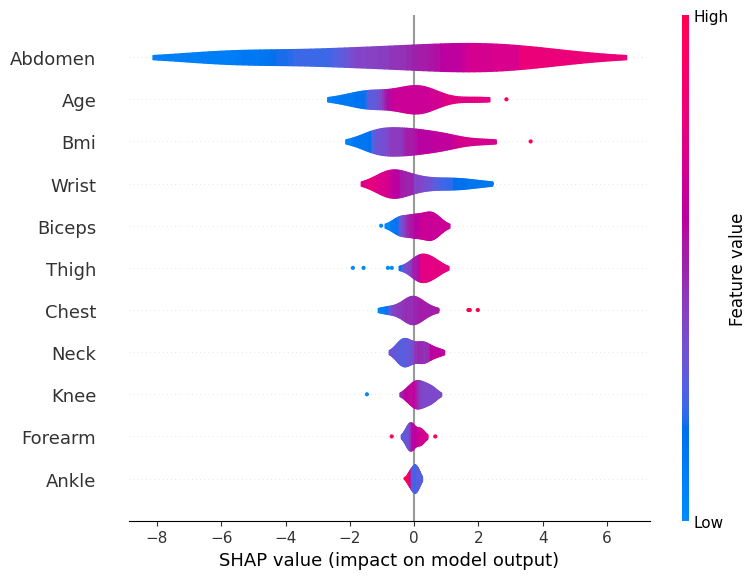

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="violin", show=False)

# Dependance Plots

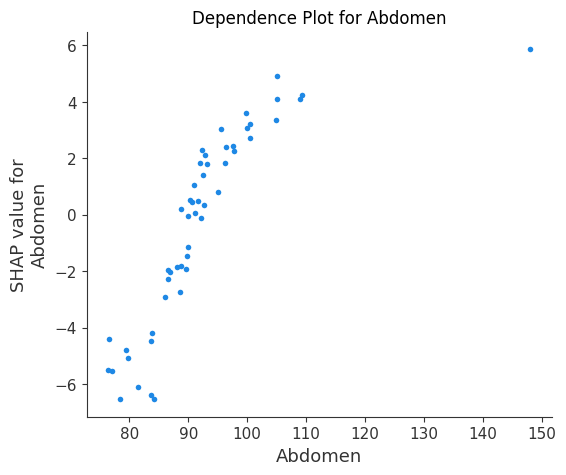

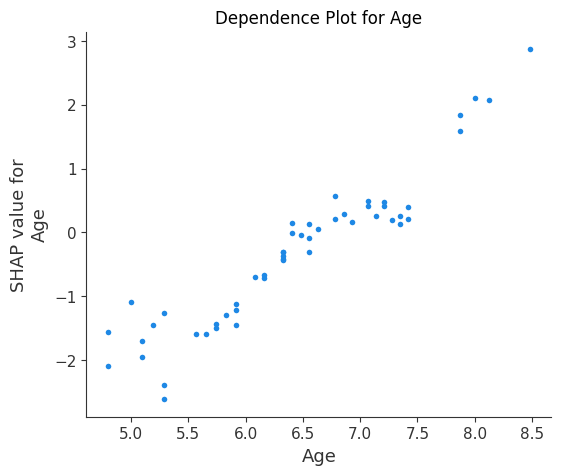

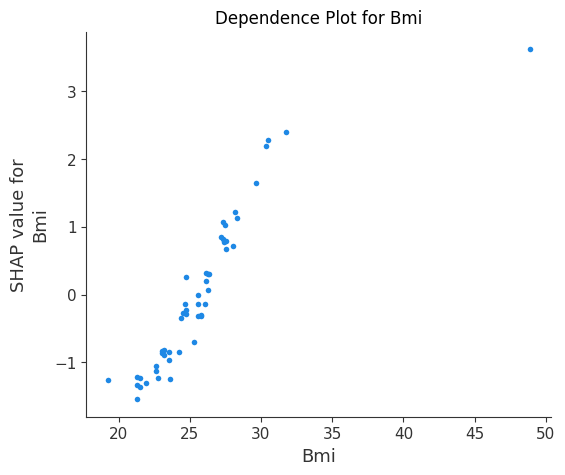

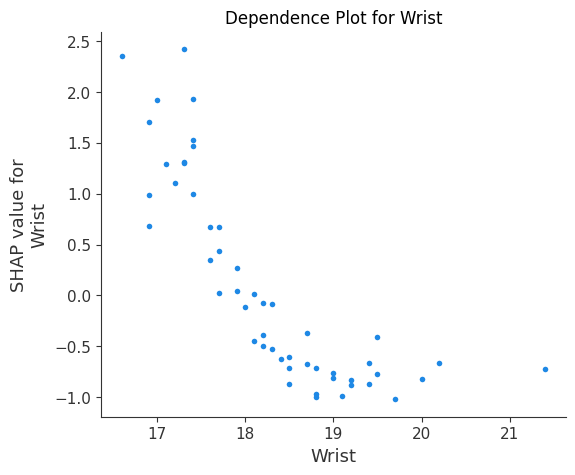

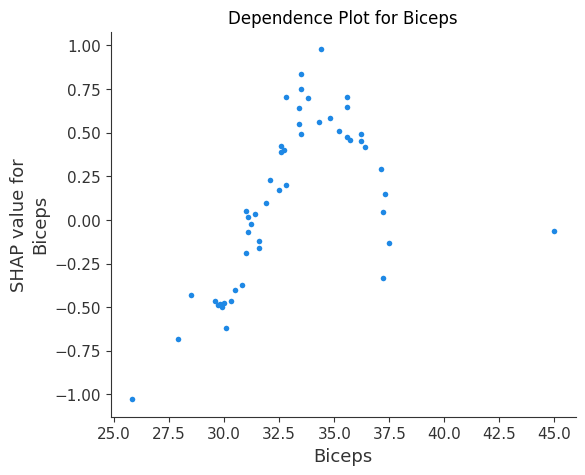

In [ ]:
top_features = np.abs(shap_values).mean(axis=0)
top_feature_indices = np.argsort(top_features)[::-1][:5]
most_important_variables = X_test.columns[top_feature_indices].tolist()
for feature in most_important_variables:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None, show=False)
    plt.title(f'Dependence Plot for {feature}')
    plt.show()

# Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

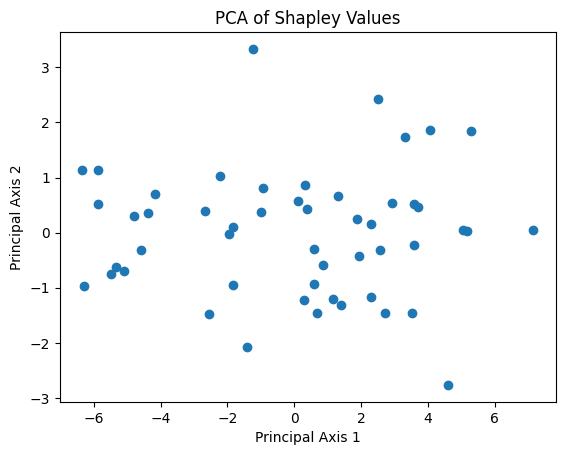

In [ ]:
pca = PCA(n_components=2)
shap_pca = pca.fit_transform(shap_values)

plt.scatter(shap_pca[:, 0], shap_pca[:, 1])
plt.title('PCA of Shapley Values')
plt.xlabel('Principal Axis 1')
plt.ylabel('Principal Axis 2')
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


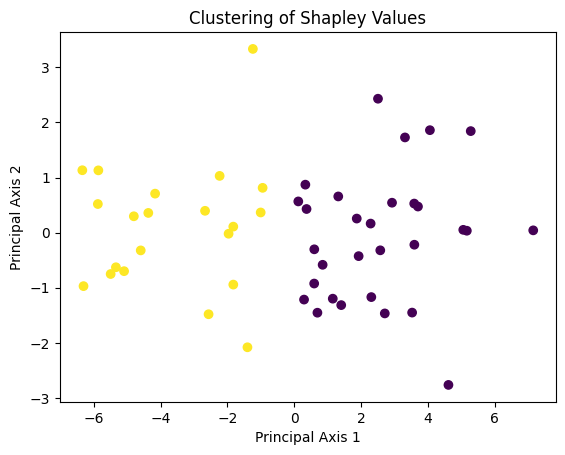

In [ ]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(shap_values)

plt.scatter(shap_pca[:, 0], shap_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering of Shapley Values')
plt.xlabel('Principal Axis 1')
plt.ylabel('Principal Axis 2')
plt.show()

In [ ]:
cluster_data = pd.DataFrame({'Cluster': clusters})
cluster_data['Shapley_Sum'] = np.sum(shap_values, axis=1)
cluster_summary = cluster_data.groupby('Cluster').mean()

print("Characteristics of each cluster:")
print(cluster_summary)

Characteristics of each cluster:
         Shapley_Sum
Cluster             
0           3.695235
1          -5.573205
